## Web Scraping the NYC Marathon (2018) 
### NYC Marathon 2018 - Overall Men's Results 


The goal of this notebook is to extract, clean, manipulate, and visualize web data using Python's libraries. Specifically, I will be analyzing the 2018 results for top 100 USA men who competed in the NYC Marathon.

Source: https://www.tcsnycmarathon.org/about-the-race/results/overall-men

In [1]:
## Import Statements
import pandas as pd 
import numpy as np
import re

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Retrieving Data

In [2]:
## Setting up Web Scraping

# link for overall men's results 
url = 'https://www.tcsnycmarathon.org/about-the-race/results/overall-men'

# getting around mod_security or some similar server security feature
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})

# loading html
html = urlopen(req).read()

In [3]:
# creating soup object with html parser set to 'lxml'
soup = BeautifulSoup(html, 'lxml')

# printing the type of the soup object
type(soup)

bs4.BeautifulSoup

In [4]:
## Generate an empty list, extract text inbetween html tags for each row, and append to list

# finding all of the table rows
table_rows = soup.find_all('tr')

# creating an empty list for the rows
rows_list = list()

for row in table_rows:
    cells = row.find_all('td')                              # finding all table cells
    str_cells = str(cells)                                  # converting from list
    clean_text = BeautifulSoup(str_cells, 'lxml').get_text()
    clean_text = clean_text.replace('\n\t\t\t\t', '')       # removing new line/tabs
    #clean_text = clean_text.replace('[', '')                # removing brackets
    #clean_text = clean_text.replace(']', '')                # removing brackets
    rows_list.append(clean_text)

In [5]:
## Inspecting Data
rows_list[:5]

['[Place, Bib, Name, Time, State, Country, Citizenship]',
 '[1, 5, Geoffrey Kamworor, 2:10:53, \xa0, Kenya, KEN]',
 '[2, 4, Wilson Kipsang, 2:10:56, \xa0, Kenya, KEN]',
 '[3, 7, Lelisa Desisa, 2:11:32, \xa0, Ethiopia, ETH]',
 '[4, 6, Lemi Berhanu, 2:11:52, \xa0, Ethiopia, ETH]']

In [6]:
## Easiest way (through trial and error) to convert the list of strings (of lists) into list
df_list = []
for x in rows_list:
    junkers = re.compile('[[" \]]')
    result = junkers.sub('', x).split(',')
    df_list.append(result)
    

#### Pandas DataFrame

In [7]:
# columns names   (for some reason, as you can see below, there are 8 columns)
column_names = df_list[0]


# loading DataFrame
df = pd.DataFrame(df_list, columns=column_names)

# inspecting first few lines
df.head()

,Place,Bib,Name,Time,State,Country,Citizenship
0,Place,Bib,Name,Time,State,Country,Citizenship
1,1,5,GeoffreyKamworor,2:10:53,,Kenya,KEN
2,2,4,WilsonKipsang,2:10:56,,Kenya,KEN
3,3,7,LelisaDesisa,2:11:32,,Ethiopia,ETH
4,4,6,LemiBerhanu,2:11:52,,Ethiopia,ETH


In [8]:
df.shape

(102, 7)

In [9]:
# dropping the first row because it contians the column names
df = df.drop([0]) 

## Changing data types to proper data types
df.Place = pd.to_numeric(df.Place)

df.Bib = pd.to_numeric(df.Bib)

In [10]:
df.tail()

,Place,Bib,Name,Time,State,Country,Citizenship
97,97.0,1034.0,ChristopherMutai,2:38:07,FL,UnitedStates,USA
98,98.0,1366.0,MathewMoody,2:38:08,NY,UnitedStates,USA
99,99.0,471.0,ThomasMcConville,2:38:11,NY,UnitedStates,USA
100,100.0,1079.0,BrettBurdick,2:38:20,IL,UnitedStates,USA
101,NaN,NaN,None,None,None,None,None


In [11]:
# last row full of NaN's
df = df.drop([101])

In [12]:
df[58:74]

,Place,Bib,Name,Time,State,Country,Citizenship
59,59.0,465.0,HughParker,2:34:15,NY,UnitedStates,USA
60,60.0,1084.0,ZacharyMeineke,2:34:22,WI,UnitedStates,USA
61,61.0,1221.0,AaronWoodman,2:34:23,,UnitedKingdom,GBR
62,62.0,1042.0,MarcoQuaglia,2:34:30,,Italy,ITA
63,63.0,1147.0,GregHutson,2:34:38,MO,UnitedStates,USA
64,64.0,1247.0,RecioAlvarez,2:34:39,,DominicanRepublic,DOM
65,65.0,478.0,DavidRoeske,2:35:16,NY,UnitedStates,USA
66,66.0,1017.0,YujiWakimoto,2:35:16,MA,UnitedStates,JPN
67,67.0,483.0,BrendonO'leary,2:35:27,MA,UnitedStates,USA
68,68.0,480.0,DanielWallace-Periac,2:35:30,NY,UnitedStates,USA


In [13]:
# creating an array for the time in minutes by parsing each time into three items in a list
time_in_minutes = []

for time in df.Time:
    try:
        t = time.split(':')

        hours, minutes, sec = t[0], t[1], t[2]
        total_mins = (int(hours) * 3600 + int(minutes) * 60 + int(sec)) / 60
        time_in_minutes.append(total_mins)

    except:
        print("Nope!", df.Time[time])

In [14]:
# creating new column from array from minutes
df['Minutes'] = time_in_minutes

# inspecting it
df.head()

,Place,Bib,Name,Time,State,Country,Citizenship,Minutes
1,1.0,5.0,GeoffreyKamworor,2:10:53,,Kenya,KEN,130.883333
2,2.0,4.0,WilsonKipsang,2:10:56,,Kenya,KEN,130.933333
3,3.0,7.0,LelisaDesisa,2:11:32,,Ethiopia,ETH,131.533333
4,4.0,6.0,LemiBerhanu,2:11:52,,Ethiopia,ETH,131.866667
5,5.0,10.0,TadesseAbraham,2:12:01,,Switzerland,SUI,132.016667


### Exploratory Data Analysis

In [15]:
df.describe()

,Place,Bib,Minutes
count,100.000000,100.000000,100.000000
mean,50.500000,1150.640000,150.685333
std,29.011492,2648.909318,7.689516
min,1.000000,3.000000,130.883333
25%,25.750000,456.750000,148.404167
50%,50.500000,928.500000,153.000000
75%,75.250000,1148.750000,156.641667
max,100.000000,19568.000000,158.333333


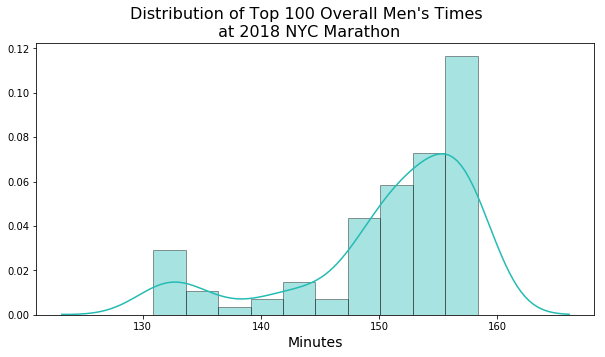

In [16]:
## Distribution Plot
f = plt.figure(figsize=(10,5))

sns.distplot(df.Minutes, hist=True, kde=True, 
             rug=False, color='#23BBB4', bins=int(np.sqrt(len(df.Time))), 
             hist_kws={'edgecolor':'black'}
            )

plt.suptitle("Distribution of Top 100 Overall Men's Times\n at 2018 NYC Marathon",
             fontsize=16)

plt.xlabel("Minutes", fontsize=14)

plt.savefig("OverallMensMinutesDistribution.png")

plt.show()

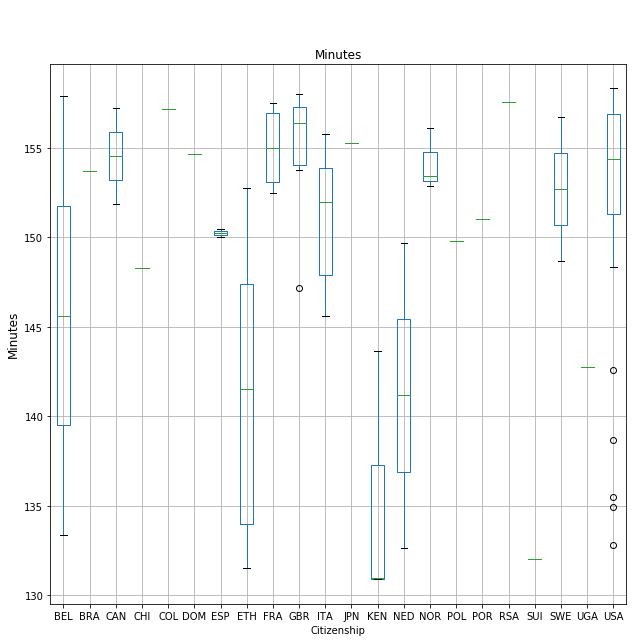

In [17]:
df.boxplot(column='Minutes', by='Citizenship', figsize=(10,10))

plt.suptitle(" ")

plt.ylabel("Minutes", fontsize=12)
plt.show()

### Counts of Top 100 Overall Mens Finishers by Country

/home/adam/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


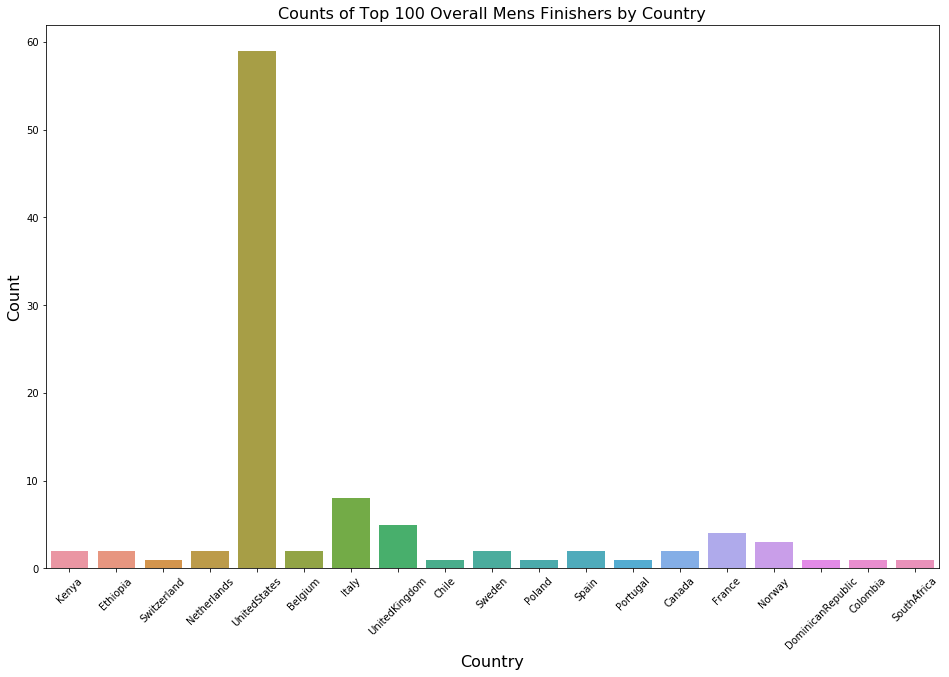

In [20]:
f = plt.figure(figsize=(16,10))

sns.countplot(x='Country', data=df.dropna())


plt.xticks(rotation=45)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Country", fontsize=16)

plt.title("Counts of Top 100 Overall Mens Finishers by Country", fontsize=16)

plt.savefig("By-Country.png")

plt.show()

### Counts of Top 100 Overall Mens Finishers by State

/home/adam/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


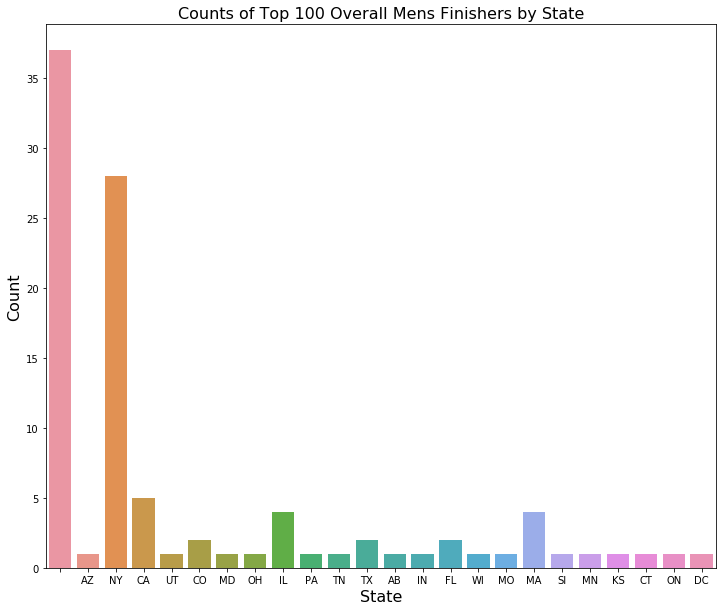

In [19]:
f = plt.figure(figsize=(12,10))

sns.countplot(x='State', data=df.dropna())



plt.ylabel("Count", fontsize=16)
plt.xlabel("State", fontsize=16)

plt.title("Counts of Top 100 Overall Mens Finishers by State", fontsize=16)

plt.show()